# Problem Sheet 5

## Task (a) (Warm-up): sequential optimisation for eigenvalues
Given a symmetric matrix $A=A^\top \in \mathbb{R}^{n \times n}$ and suppose the first eigenvalue $\lambda_{\max}(A)=\lambda_1(A)$ and eigenvector $\mathbf{u}_{\max}\in\mathbb{R}^n$, $\|\mathbf{u}_{\max}\|_2=1$ are known.

- Prove that the second eigenvalue $\lambda_2(A) \le \lambda_1(A)$ can be found as
$$
\lambda_2(A) = \max_{\mathbf{x} \in \mathbb{R}^n, \|\mathbf{x}\|_2=1, \langle \mathbf{u}_{\max}, \mathbf{x} \rangle = 0}\langle \mathbf{x}, A \mathbf{x} \rangle,
$$
and a maximizer 
$$
\mathbf{x}_* = \arg\max_{\mathbf{x} \in \mathbb{R}^n, \|\mathbf{x}\|_2=1, \langle \mathbf{u}_{\max}, \mathbf{x} \rangle = 0}\langle \mathbf{x}, A \mathbf{x} \rangle
$$
is the corresponding eigenvector.

- Suggest how to implement the constraints $\|\mathbf{x}\|_2=1, \langle \mathbf{u}_{\max}, \mathbf{x} \rangle = 0$ in practice.

## Task (b): Principal Component Analysis
Consider a dataset $\mathbf{X} = \{\mathbf{x}_1, \mathbf{x}_2\}$, where
$$
\mathbf{x}_1 = \begin{bmatrix}2 \\ 1\end{bmatrix}, \qquad \mathbf{x}_2 = \begin{bmatrix}1 \\ 2\end{bmatrix}.
$$
- Calculate the PCA matrix $A = \frac{1}{m}\sum_{i=1}^{m} \mathbf{x}_i \mathbf{x}_i^\top$.
- Calculate the principal component for $r=1$, that is, a vector $\mathbf{u}\in\mathbb{R}^2$, $\|\mathbf{u}\|_2=1$, corresponding to the maximal eigenvalue of $A$.

_Hint: Consider $\mathbf{u} = (v, \sqrt{1-v^2})^\top$, $-1\le v \le 1$, and solve the variational characterisation problem for $\lambda_{\max}(A)$ with respect to $v$._

## Task (c): VC-dimension of the halfspaces classifier (lower bound)
Consider the halfspaces prediction rule in the homogeneous form,
$$
h_{\boldsymbol\theta}(\mathbf{x}) = \mathrm{sign}(\langle \boldsymbol\theta, \mathbf{x}\rangle) \in \mathcal{H}_n^{hs},
$$
where $\mathbf{x} = \begin{bmatrix}1\\ \mathbf{\hat x}\end{bmatrix}$, $\mathbf{\hat x} \in \mathbb{R}^n$, $\boldsymbol\theta \in \mathbb{R}^{n+1}.$
Consider a dataset 
$$
\mathbf{X} = \begin{bmatrix}\mathbf{x}_1 & \cdots & \mathbf{x}_{n+1} \end{bmatrix} = 
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 & 1 \\
0 & 1 & 0 & \cdots & 0 & 0 \\
0 & 0 & 1 & \cdots & 0 & 0 \\
\vdots & & & \ddots & & \vdots \\
0 & 0 & 0 & \cdots & 1 & 0 \\
0 & 0 & 0 & \cdots & 0 & 1
\end{bmatrix} \in \mathbb{R}^{(n+1) \times (n+1)}
$$
- Show that $\mathbf{X}$ is shattered by $\mathcal{H}_n^{hs}$, that is, for any $y_1,\ldots,y_{n+1} \in \{-1,1\}$ you can find $\boldsymbol\theta$ such that $h_{\boldsymbol\theta}(\mathbf{x}_i) = y_i$, $i=1,\ldots,n+1$.

_Hint: you can solve the system of linear equations $\langle \boldsymbol\theta, \mathbf{x}_i\rangle = y_i$ exactly, so the $\mathrm{sign}()$ function is not needed in this case._

**Remark:** therefore, $\text{VC-dim}(\mathcal{H}_n^{hs}) \ge n+1$. In fact, one can prove that $\text{VC-dim}(\mathcal{H}_n^{hs}) = n+1$.

---

## Task 1: PCA computation in Python
The following code generates a dataset $X\in\mathbb{R}^{2 \times m}$ of $m=20$ points where each $\mathbf{x}_i$ is in the form $(x,x+y)^T$, where $x$ is chosen uniformly at random from $[-1,1]$, and $y$ is sampled from the normal distribution with mean zero and variance $0.01$.

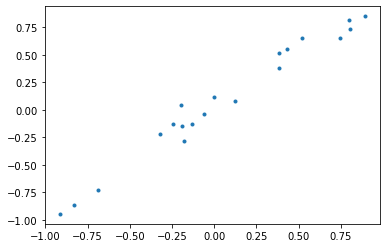

In [1]:
import numpy as np
from matplotlib import pyplot as plt
X1 = np.random.uniform(low=-1, high=1, size=20)
X2 = X1 + np.random.normal(scale=0.1, size=X1.size)
X = np.vstack((X1,X2))
plt.plot(X[0], X[1], '.')
plt.show()

- Compute the PCA matrix $A = \frac{1}{m}\sum_{i=1}^{m} \mathbf{x}_i \mathbf{x}_i^\top$. _Hint: you can avoid using a `for` loop._
- Read about [`numpy.linalg.eigh`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) and compute the eigenvector $\mathbf{u}$ corresponding to the largest eigenvalue of $A$. Does it look close to the $\mathbf{u}$ calculated in Task (b)?

## Task 2: compression and recovery of data from PCA
- Write a Python code to compress $\mathbf{x}_i$ into $z_i = \mathbf{u}^T \mathbf{x}_i \in \mathbb{R}$, $i=1,\ldots,m$. _(Again, you can use numpy facilities instead of a for loop)_
- Write a Python code to reconstruct the approximate data $\mathbf{\tilde x}_i = \mathbf{u} z_i$.
- Plot both the original data $X = [\mathbf{x}_1,\ldots,\mathbf{x}_m]$ (you can copy the code from Task 1) and the reconstructed data $\tilde X = [\mathbf{\tilde x}_1,\ldots,\mathbf{\tilde x}_m]$ **on the same plot**. How accurate is the reconstruction?